
<h2 style='color:#ae01dd;'>1-Imports</h2>

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


<h2 style='color:#ae01dd;'>2-Loading data</h2>

In [139]:
data=pd.read_csv("Dataset_Cafet.csv",encoding='utf-8')

In [140]:
data.head()

,Jour,Date,Pain au chocolat,Croissant,Pains suisses,Sandwiches poulet crudités,Sandwiches thon cruditès,Sandwiches végétarien,Sandwiches poulet,Sandwiches chèvre miel crudités,Sandwiches poulet curry,Sandwiches saumon,Panini 4 fromages,"Panini poulet Kebab (ketchup,mayo)",Salade Thon,Salade Poulet
0,Lundi,06/02/2023,20,10,15,5,0,3,10,7,10,7,8,8,0,0
1,Mardi,07/02/2023,20,10,15,10,5,3,10,7,0,10,8,8,0,0
2,Mercredi,08/02/2023,20,10,15,10,10,3,5,0,10,5,8,8,0,0
3,Jeudi,09/02/2023,20,10,15,7,8,3,7,7,0,0,3,3,0,0
4,Vendredi,10/02/2023,20,10,15,0,5,3,15,5,10,10,5,5,0,0


<h2 style='color:#ae01dd'>3-Data exploration</h2>

<h4 style='color:#afaaf0'>3.1-Déffinition des features et des labels<h4>

In [114]:
data.Date=data.Date.map(lambda x: x.split('/')[0]+'/'+x.split('/')[1])
data['Day']=data.Date.map(lambda x: int(x.split('/')[0]))
data['Month']=data.Date.map(lambda x: int(x.split('/')[1]))


In [133]:
features=['Day','Month']
sandwiches_labes=[
    'Sandwiches poulet crudités','Sandwiches thon cruditès','Sandwiches végétarien','Sandwiches chèvre miel crudités',
    'Sandwiches poulet curry','Sandwiches saumon','Panini 4 fromages','Panini poulet Kebab (ketchup,mayo)','Sandwiches poulet']
data_set_columns=['Day','Month','Sandwiches poulet crudités','Sandwiches thon cruditès','Sandwiches végétarien','Sandwiches chèvre miel crudités',
    'Sandwiches poulet curry','Sandwiches saumon','Panini 4 fromages','Panini poulet Kebab (ketchup,mayo)','Sandwiches poulet']
                  
colors=['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']


In [134]:

data_set=data[data_set_columns]
data_set.head()

,Day,Month,Sandwiches poulet crudités,Sandwiches thon cruditès,Sandwiches végétarien,Sandwiches chèvre miel crudités,Sandwiches poulet curry,Sandwiches saumon,Panini 4 fromages,"Panini poulet Kebab (ketchup,mayo)",Sandwiches poulet
0,6,2,5,0,3,7,10,7,8,8,10
1,7,2,10,5,3,7,0,10,8,8,10
2,8,2,10,10,3,0,10,5,8,8,5
3,9,2,7,8,3,7,0,0,3,3,7
4,10,2,0,5,3,5,10,10,5,5,15


In [136]:
correlation=data_set.corr()
correlation=correlation.round(2)
correlation

,Day,Month,Sandwiches poulet crudités,Sandwiches thon cruditès,Sandwiches végétarien,Sandwiches chèvre miel crudités,Sandwiches poulet curry,Sandwiches saumon,Panini 4 fromages,"Panini poulet Kebab (ketchup,mayo)",Sandwiches poulet
Day,1.00,-0.10,-0.06,-0.04,0.03,0.07,0.06,-0.03,0.15,0.10,0.09
Month,-0.10,1.00,0.00,0.06,-0.82,-0.09,0.37,-0.52,-0.15,-0.08,0.05
Sandwiches poulet crudités,-0.06,0.00,1.00,0.44,0.21,0.48,0.05,-0.12,0.47,0.50,0.11
Sandwiches thon cruditès,-0.04,0.06,0.44,1.00,0.20,0.24,0.25,-0.22,0.29,0.33,0.16
Sandwiches végétarien,0.03,-0.82,0.21,0.20,1.00,0.28,-0.22,0.52,0.39,0.33,0.17
Sandwiches chèvre miel crudités,0.07,-0.09,0.48,0.24,0.28,1.00,0.05,-0.05,0.44,0.46,0.26
Sandwiches poulet curry,0.06,0.37,0.05,0.25,-0.22,0.05,1.00,-0.10,0.46,0.50,0.36
Sandwiches saumon,-0.03,-0.52,-0.12,-0.22,0.52,-0.05,-0.10,1.00,0.31,0.24,0.19
Panini 4 fromages,0.15,-0.15,0.47,0.29,0.39,0.44,0.46,0.31,1.00,0.98,0.64
"Panini poulet Kebab (ketchup,mayo)",0.10,-0.08,0.50,0.33,0.33,0.46,0.50,0.24,0.98,1.00,0.65


<h4 style='color:#afaaf0'>3.2-Les graphes des labels en fonction des date<h4>

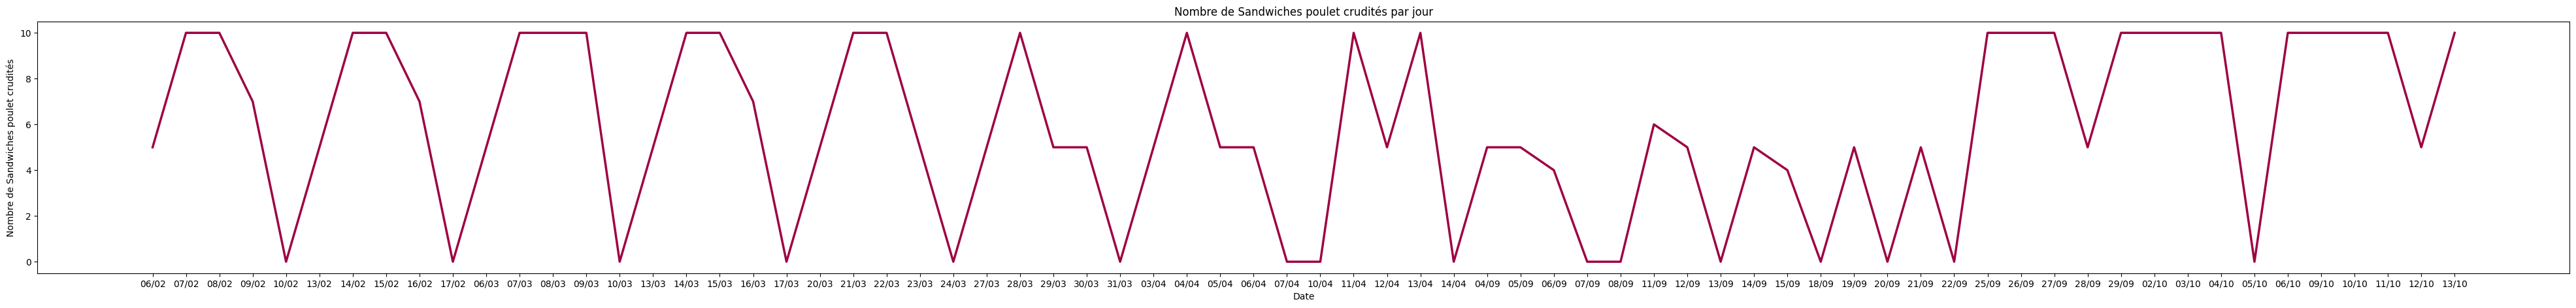

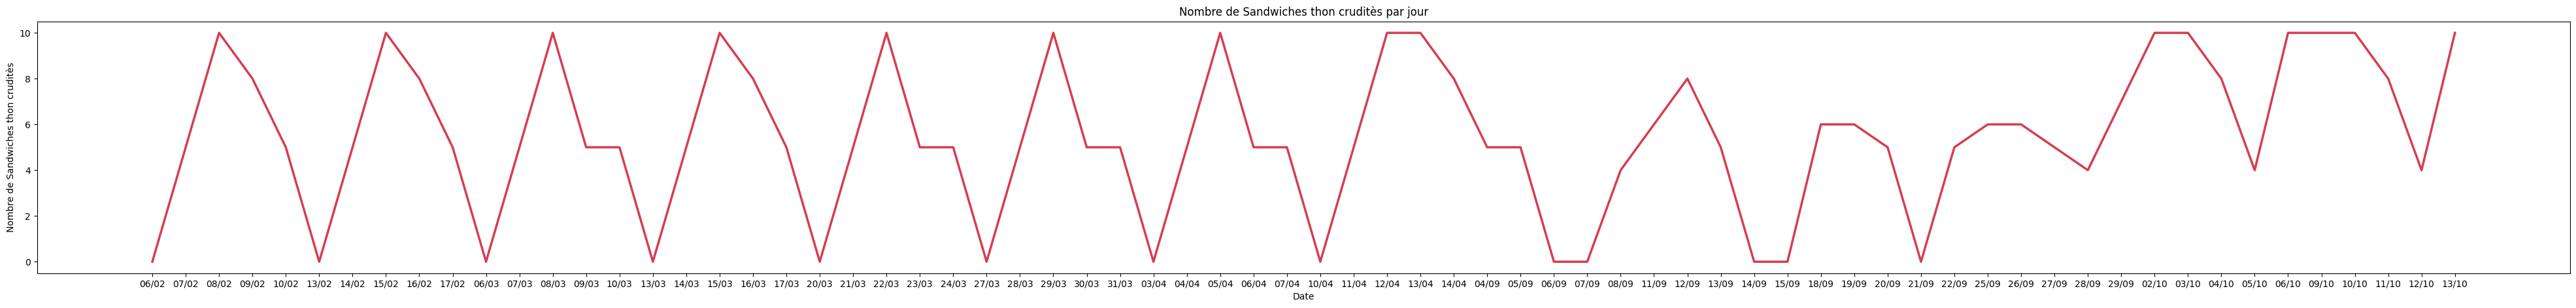

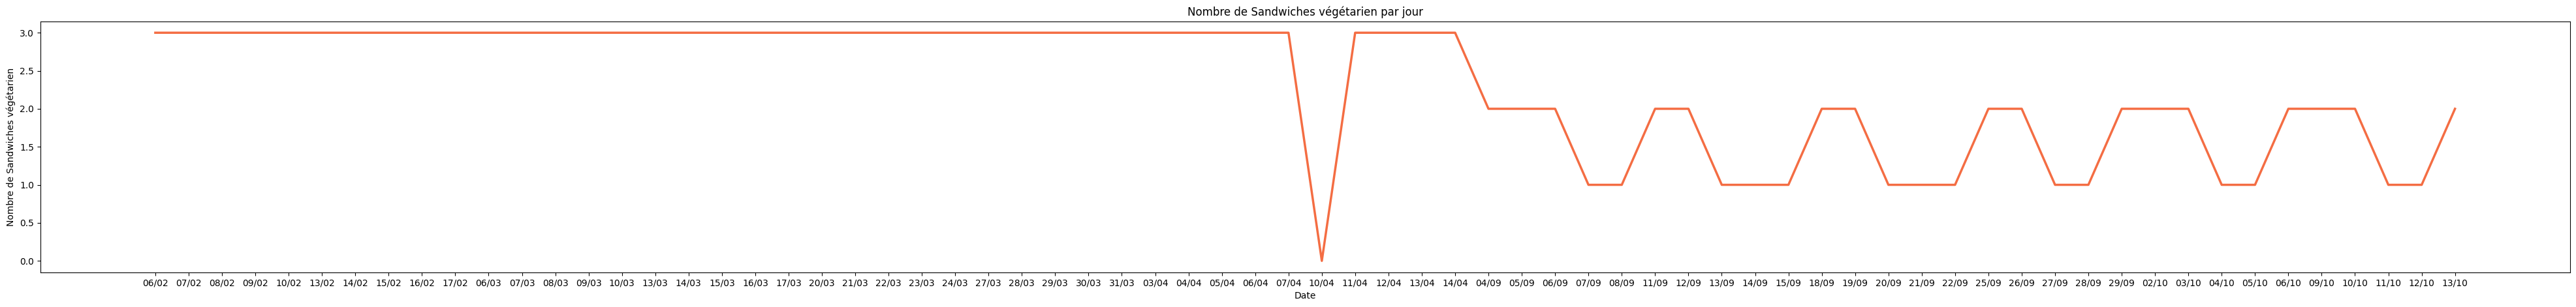

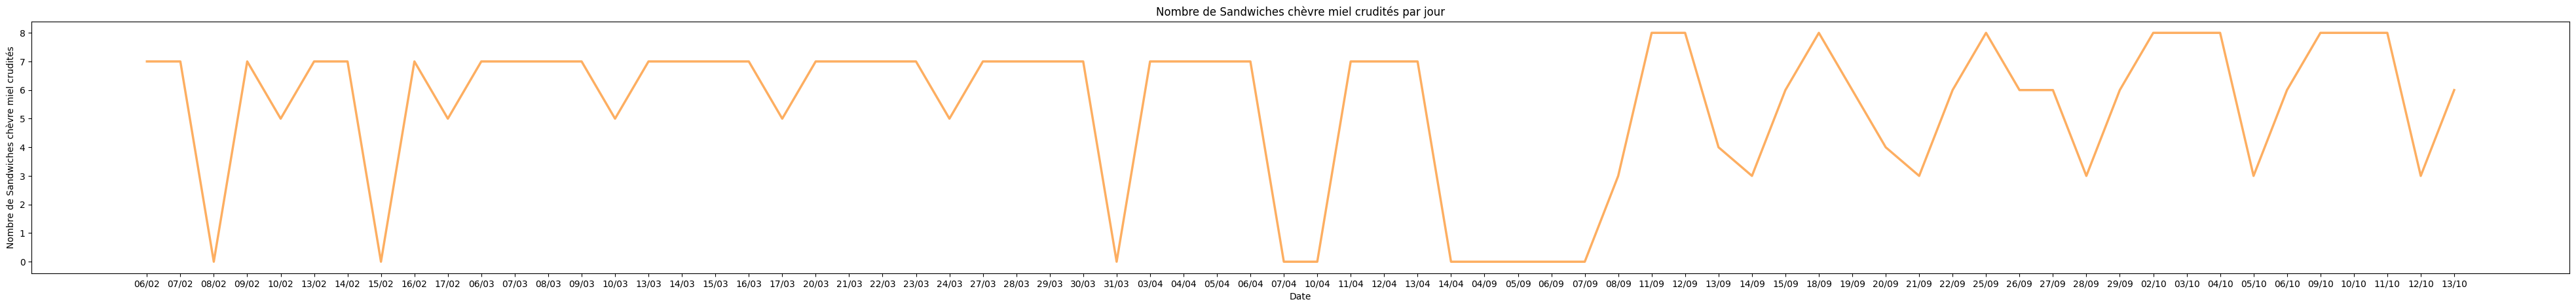

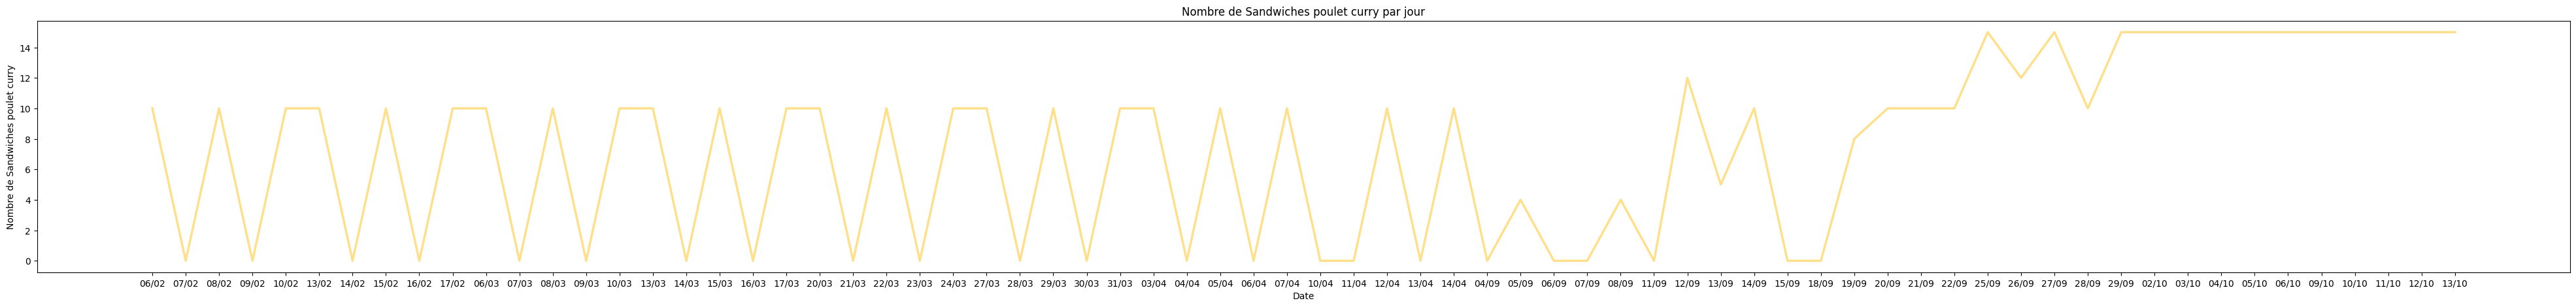

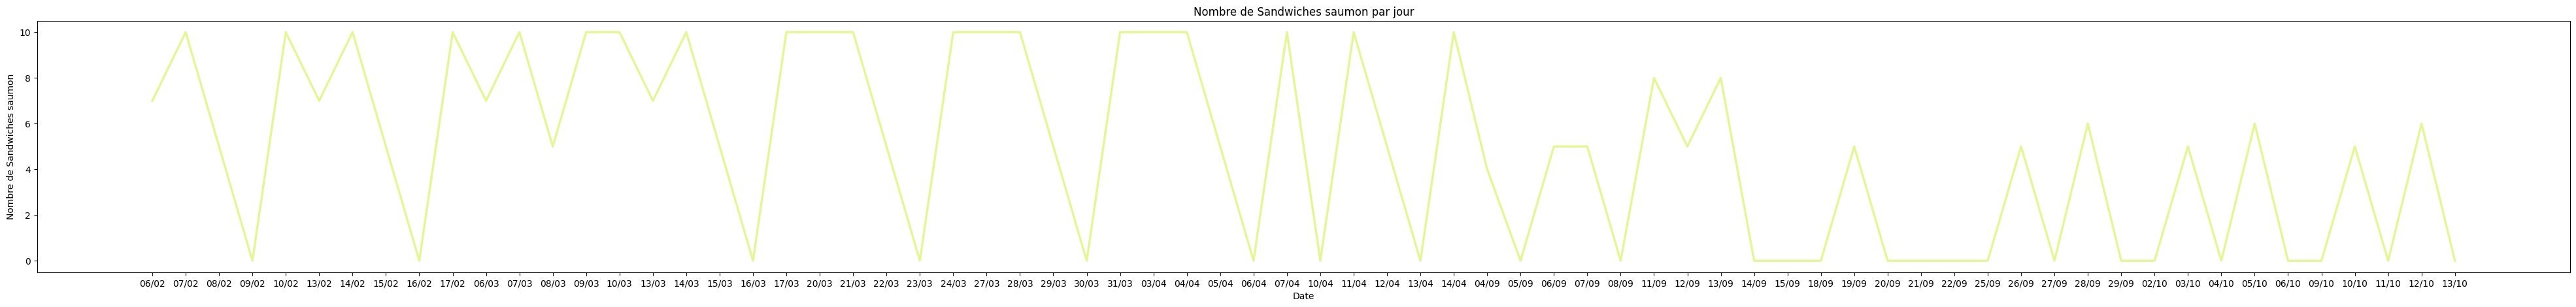

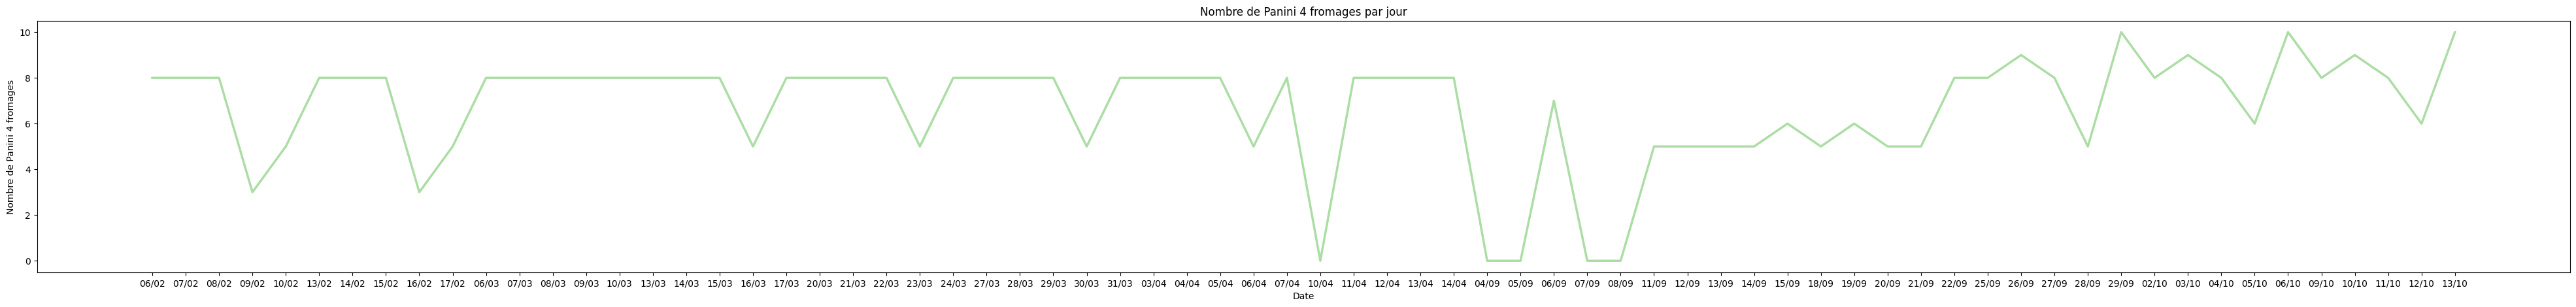

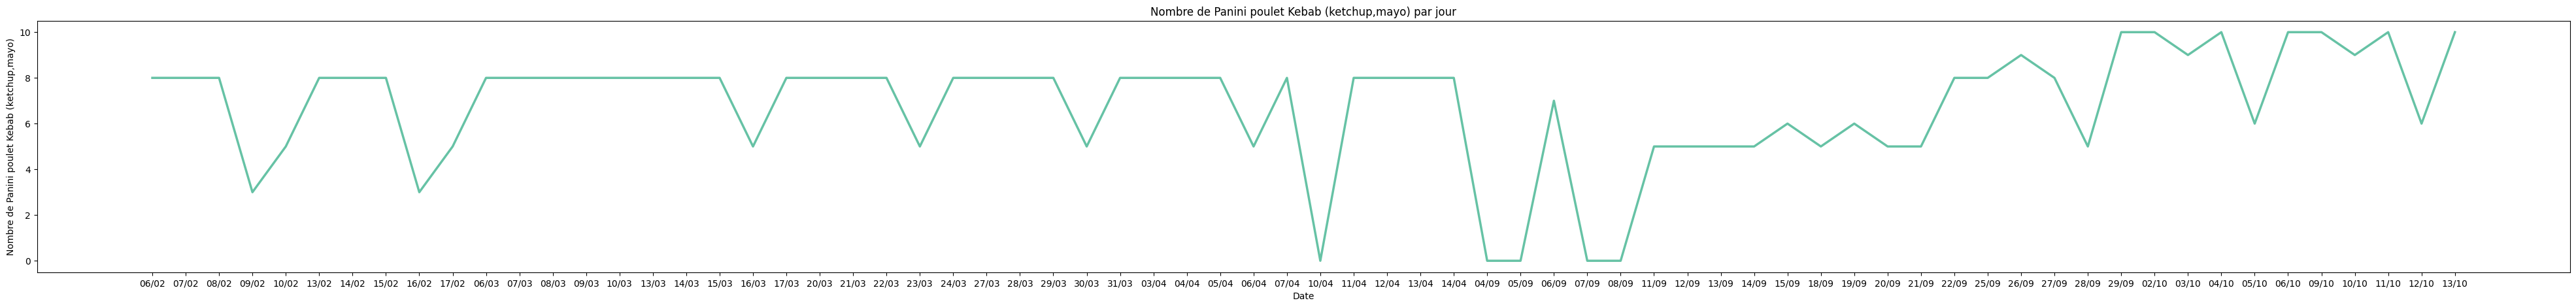

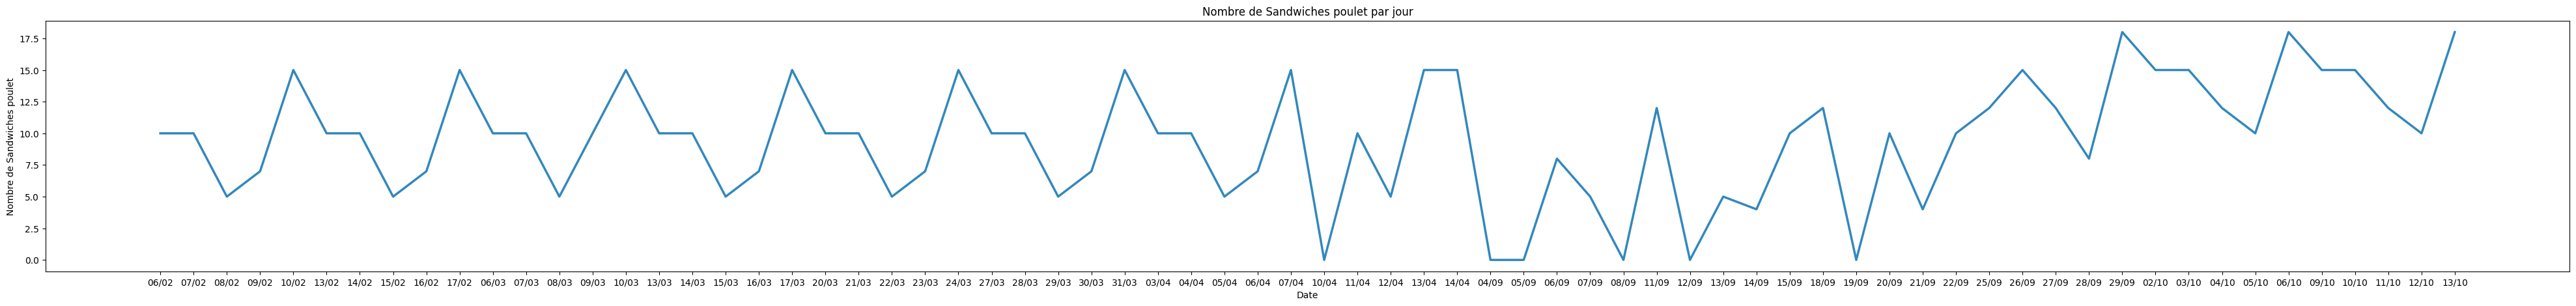

In [137]:

data.Jour=data.Jour.astype("str")
title="Nombre de {} par jour"
titleX="Date"
titleY="Nombre de {}"
for i in range(len(colors)):
    fig=plt.figure(figsize=(50,5))
    plt.title(title.format(sandwiches_labes[i]))
    plt.xlabel(titleX)
    plt.ylabel(titleY.format(sandwiches_labes[i]))
    plt.plot(data.Date,data[sandwiches_labes[i]],c=colors[i],linewidth = '2.5')

<b style='color:#aaee00;'>Selon les graphiques ci-dessous, on peut conclure que: que les 'Panini 4 fromages' et 'Panini poulet Kebab (ketchup,mayo)' ont présque les memes variation: 
<br>
<u>
Donc on peut étudier l'un des deux et par suite déduit la résultat de l'autre</u>


</b>

<h2 style='color:#ae01dd'>4-Data exploration</h2>

3.4


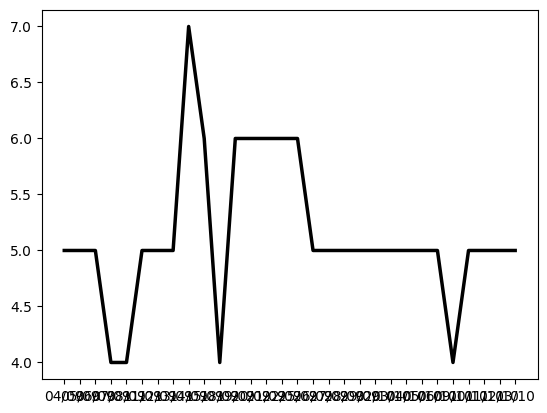

In [ ]:
knn=KNeighborsRegressor()
knn.fit(data[features][0:40],data[sandwiches_labes[0]][0:40])
y_pred=knn.predict(data[features][40:])
y_pred=np.round(y_pred).astype(int)
plt.plot(data['Date'][40:],y_pred,c='black',linewidth = '2.5')
mae= mean_absolute_error(y_pred,data[sandwiches_labes[0]][40:])

print(mae)


In [ ]:
'''
lundi_sandwitch=lundi.loc[:,[
    'Sandwiches végétarien',
    'Sandwiches poulet',
    'Sandwiches saumon',
    'Sandwiches thon cruditès',
    'Sandwiches poulet crudités',
    'Panini 4 fromages',
    'Sandwiches poulet curry',
    'Panini poulet Kebab (ketchup,mayo)',
    'Sandwiches chèvre miel crudités',
    'Salade Thon',
    'Salade Poulet']]

lundi_sandwitch.head()

lundi=data[data.Jour.str.strip()=='Lundi']
mardi=data[data.Jour.str.strip()=='Mardi']
mercredi=data[data.Jour.str.strip()=='Mercredi']
jeudi=data[data.Jour.str.strip()=='Jeudi']
vendredi=data[data.Jour.str.strip()=='Vendredi']
'''

"\nlundi_sandwitch=lundi.loc[:,[\n    'Sandwiches végétarien',\n    'Sandwiches poulet',\n    'Sandwiches saumon',\n    'Sandwiches thon cruditès',\n    'Sandwiches poulet crudités',\n    'Panini 4 fromages',\n    'Sandwiches poulet curry',\n    'Panini poulet Kebab (ketchup,mayo)',\n    'Sandwiches chèvre miel crudités',\n    'Salade Thon',\n    'Salade Poulet']]\n\nlundi_sandwitch.head()\n\nlundi=data[data.Jour.str.strip()=='Lundi']\nmardi=data[data.Jour.str.strip()=='Mardi']\nmercredi=data[data.Jour.str.strip()=='Mercredi']\njeudi=data[data.Jour.str.strip()=='Jeudi']\nvendredi=data[data.Jour.str.strip()=='Vendredi']\n"